## 1.4.9 Contours in OpenCV

In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [51]:
img = cv2.imread('OpenCV_Logo_with_text.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

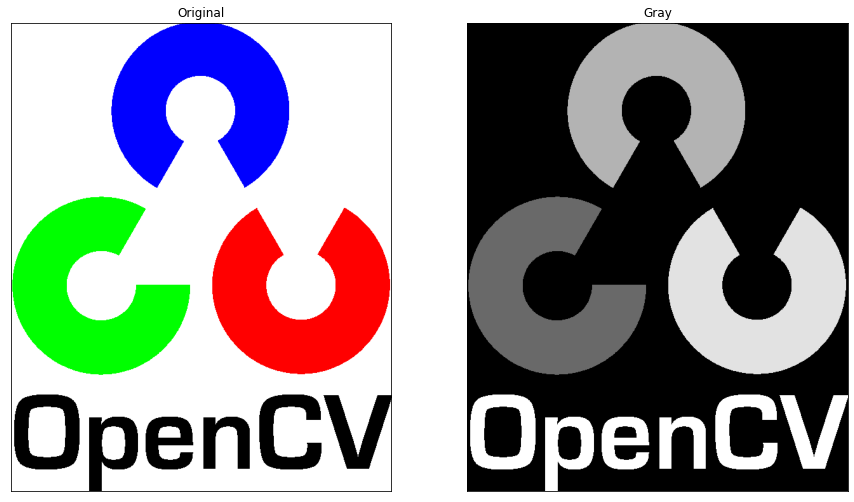

In [52]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [53]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

In [54]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [55]:
img_cnt = cv2.drawContours(img,contours,-1,(255,32,32,),2)
img = cv2.imread('OpenCV_Logo_with_text.png')

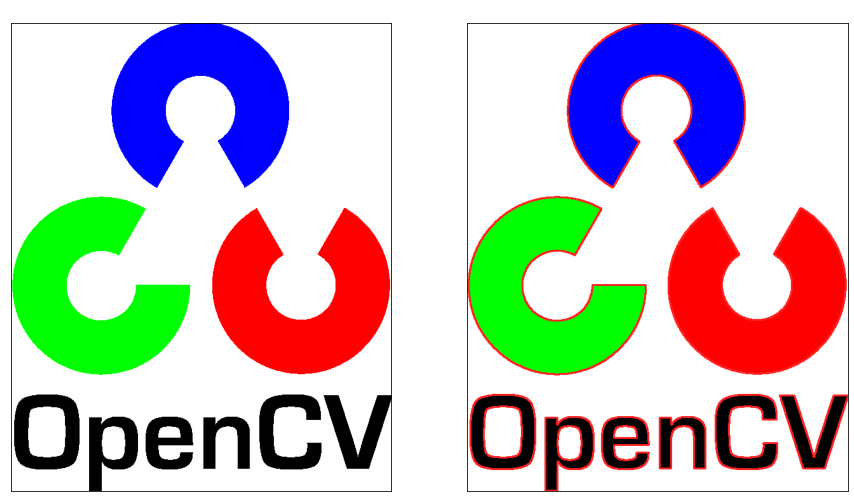

In [56]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original', color = 'white'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_cnt, cmap = 'gray')
plt.title('Countour', color = 'white'), plt.xticks([]), plt.yticks([])
plt.show()

In [61]:
cnt = contours[0]
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [62]:
imgcontour = cv2.imread('OpenCV_Logo_with_text.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('OpenCV_Logo_with_text.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('OpenCV_Logo_with_text.png')

In [63]:
cnt.shape, approx.shape

((61, 1, 2), (13, 1, 2))

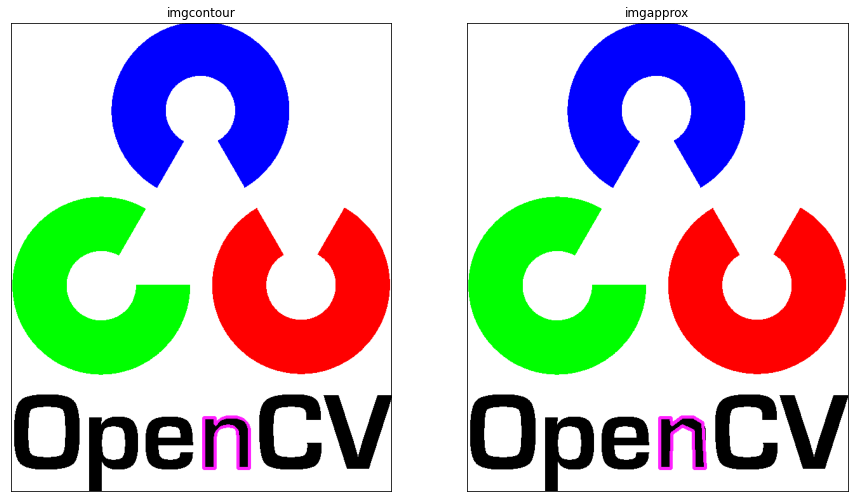

In [64]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [68]:
hull = cv2.convexHull(approx)

In [74]:
imghull = cv2.imread('OpenCV_Logo_with_text.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

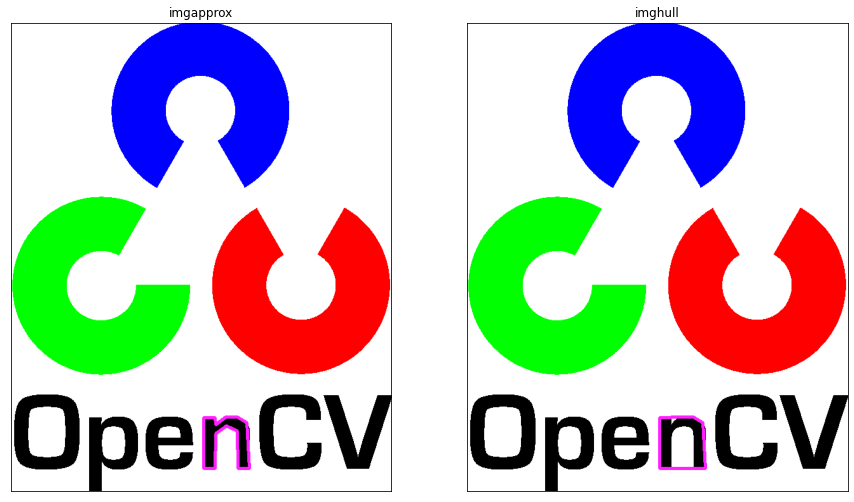

In [75]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [76]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('OpenCV_Logo_with_text.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

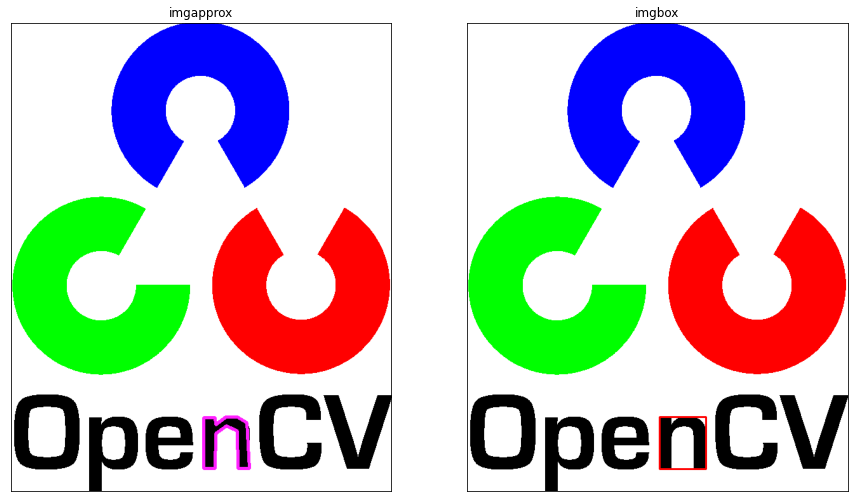

In [77]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [86]:
imgcontour = cv2.imread('OpenCV_Logo_with_text.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

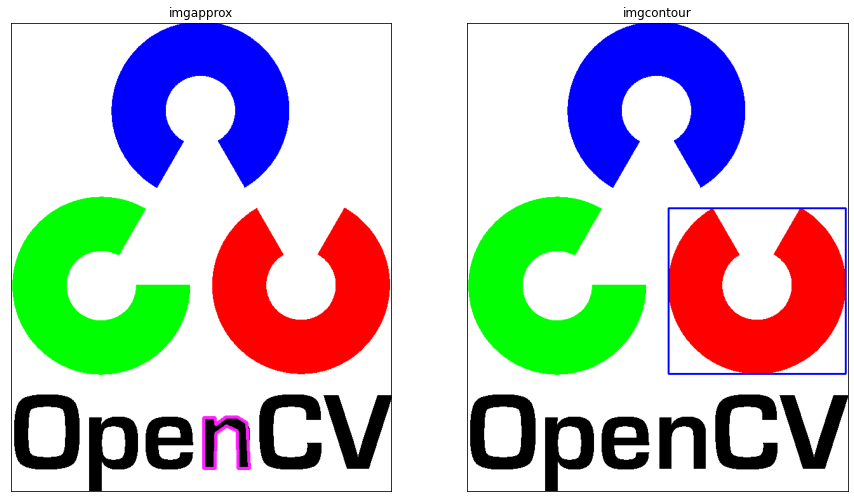

In [87]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [90]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 43077.5, 'm10': 19661511.833333332, 'm01': 18678067.166666664, 'm20': 9255938404.916666, 'm11': 8524360569.458333, 'm02': 8284999604.25, 'm30': 4481929556004.75, 'm21': 4007988822990.5166, 'm12': 3780875797439.5835, 'm03': 3752202508352.5503, 'mu20': 281994987.3017483, 'mu11': -717223.3850622177, 'mu02': 186335729.0828886, 'mu30': -100228370.421875, 'mu21': -4658982137.86647, 'mu12': 42994584.1733551, 'mu03': -1695967898.5830078, 'nu20': 0.15196389141823843, 'nu11': -0.00038650352494950374, 'nu02': 0.10041420513404574, 'nu30': -0.000260234242315621, 'nu21': -0.01209664171438109, 'nu12': 0.0001116316965838478, 'nu03': -0.004403433072109889}


In [91]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [92]:
area = cv2.contourArea(cnt)

In [93]:
perimeter = cv2.arcLength(cnt,True)

In [94]:
imginfo = cv2.imread('OpenCV_Logo_with_text.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

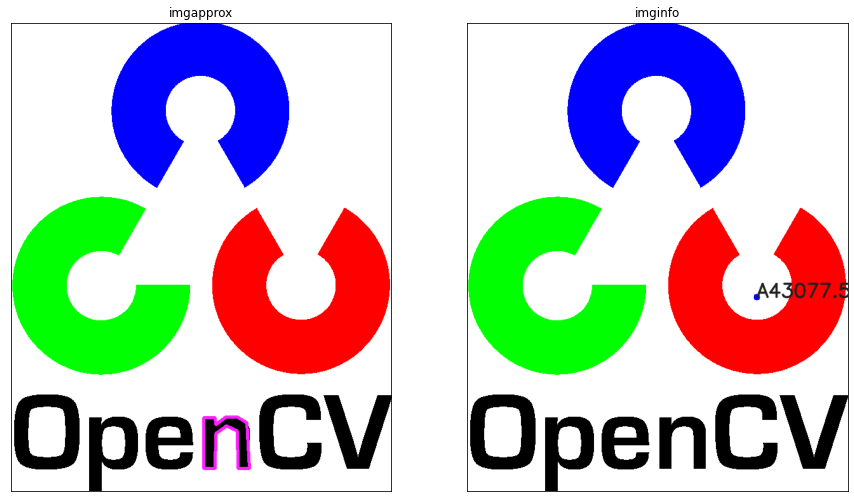

In [95]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()